In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names
# Corrected download link to download the raw .cfg file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
# 1. Charger le modèle YOLO et les fichiers de configuration
weights_path = "yolov3.weights"  # Téléchargez depuis https://pjreddie.com/media/files/yolov3.weights
config_path = "yolov3.cfg"       # Téléchargez depuis https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
classes_path = "coco.names"      # Téléchargez depuis https://github.com/pjreddie/darknet/blob/master/data/coco.names
# ... rest of your code ...

--2024-11-24 21:50:18--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-11-24 21:50:18 (30.1 MB/s) - ‘coco.names’ saved [625/625]

--2024-11-24 21:50:18--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3

In [ ]:
# Charger les classes
with open(classes_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Charger le modèle YOLO
net = cv2.dnn.readNet(weights_path, config_path)

# 2. Définir les paramètres du modèle YOLO
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))



In [ ]:
# 3. Charger une image de test
image_path = "test_image.jpg"  # Chemin de l'image de test
image = cv2.imread(image_path)
height, width, _ = image.shape

# Prétraitement de l'image pour YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


In [ ]:
# 4. Effectuer la détection
layer_outputs = net.forward(output_layers)

# Stocker les informations sur les objets détectés
boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Seulement les détections avec une confiance > 50%
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
print(boxes)
print(confidences)
print(class_ids)

[[472, 86, 219, 79], [489, 87, 212, 80], [468, 96, 225, 76], [107, 111, 470, 297], [112, 81, 461, 356], [163, 100, 406, 317], [117, 124, 452, 307], [100, 106, 475, 359], [160, 116, 407, 318], [123, 100, 474, 360], [110, 155, 209, 370], [122, 223, 197, 320], [135, 213, 209, 328], [117, 245, 200, 313]]
[0.9369497895240784, 0.8559303879737854, 0.8421579003334045, 0.912955105304718, 0.8770499229431152, 0.9230241775512695, 0.9900927543640137, 0.9846717715263367, 0.9856104850769043, 0.5817241072654724, 0.9041640162467957, 0.9979028701782227, 0.9602786302566528, 0.9668748378753662]
[7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 16, 16, 16, 16]


In [ ]:
# 5. Appliquer Non-Maximum Suppression (NMS) pour réduire les boîtes redondantes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
indexes

array([11,  6,  0], dtype=int32)

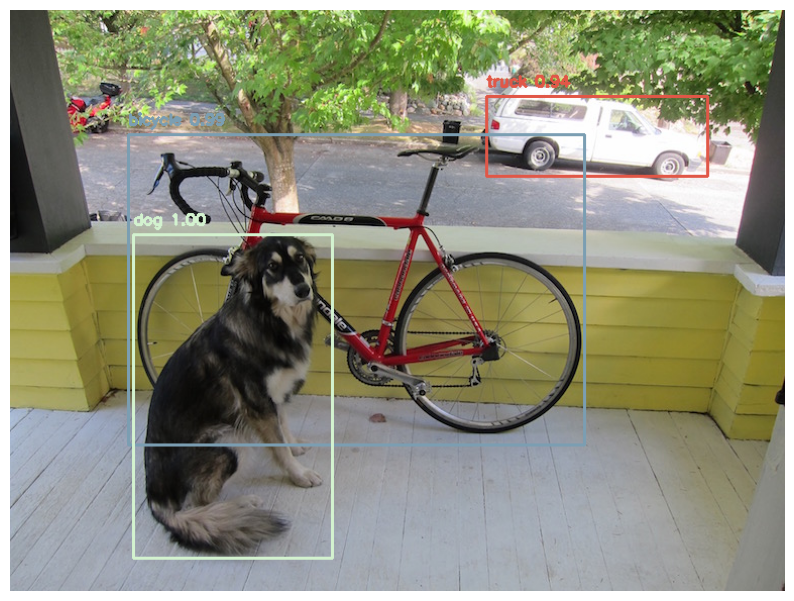

In [ ]:
# 6. Visualiser les résultats
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        confidence = confidences[i]

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), font, 0.5, color, 2)

# Convertir l'image en RGB pour matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()